In [1]:
## A Machine Learning approach for Malware Detection

Importing all the required libraries

In [2]:
import os
import pandas
import numpy
import pickle
#import pefile
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation, tree, linear_model
from sklearn.feature_selection import SelectFromModel
#from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd 

Loading the initial dataset delimited by | 

In [3]:
dataset = pandas.read_csv('/kaggle/input/pe-header-data/data.csv',sep='|', low_memory=False)

In [4]:
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [5]:
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


Number of malicious files vs Legitimate files in the training set

In [6]:
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

Dropping columns like Name of the file, MD5 (message digest) and label

In [7]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values

##### ExtraTreesClassifier
ExtraTreesClassifier fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

In [8]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

ExtraTreesClassifier helps in selecting the required features useful for classifying a file as either Malicious or Legitimate

14 features are identified as required by ExtraTreesClassifier

In [9]:
nbfeatures

13

######  Cross Validation
Cross validation is applied to divide the dataset into random train and test subsets.
test_size = 0.2 represent the proportion of the dataset to include in the test split 

In [10]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_new, y ,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [11]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

The features identified by ExtraTreesClassifier

In [12]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

1. feature DllCharacteristics (0.164074)
2. feature Characteristics (0.116689)
3. feature Machine (0.108534)
4. feature Subsystem (0.062725)
5. feature MajorSubsystemVersion (0.056713)
6. feature ImageBase (0.056651)
7. feature VersionInformationSize (0.055926)
8. feature SectionsMaxEntropy (0.048873)
9. feature ResourcesMaxEntropy (0.047343)
10. feature SizeOfOptionalHeader (0.038201)
11. feature ResourcesMinEntropy (0.025430)
12. feature MajorOperatingSystemVersion (0.022365)
13. feature SectionsMinEntropy (0.019266)


Building the below Machine Learning model

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [14]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying Support vector machine Classifier ----------')
SVM = LinearSVC(loss='hinge', dual=True)
SVM.fit(X_train,y_train)
SVM_prediction = SVM.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying Support vector machine Classifier ----------


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [15]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('SVM ', accuracy_score(y_test,  SVM_prediction)*100,
                precision_score(y_test,  SVM_prediction)*100,
                recall_score(y_test,  SVM_prediction)*100,
                f1_score(y_test,  SVM_prediction)*100))


print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('KNN ', 99.02933719666788, 97.94412867335832, 98.80444064901793, 98.37240374104215), ('RF ', 99.21043100325969, 98.59909855037155, 98.74344272294742, 98.6712178471291), ('NB ', 70.3187250996016, 100.0, 0.02439917042820544, 0.04878643737041102), ('SVM ', 66.2586019558131, 11.44038594073053, 2.0251311455410517, 3.4411276948590377)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accurary  Precision     Recall   F1-Score
2        KNN   99.029337  97.944129  98.804441  98.372404
3         RF   99.210431  98.599099  98.743443  98.671218
4         NB   70.318725      100.0   0.024399   0.048786
5        SVM   66.258602  11.440386   2.025131   3.441128


In [16]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix SVM_prediction')
print(confusion_matrix(y_test,SVM_prediction))

Confusion Matrix gnb_prediction
[[19413     0]
 [ 8195     2]]
Confusion Matrix KNN_prediction
[[19243   170]
 [   98  8099]]
Confusion Matrix RF_prediction
[[19298   115]
 [  103  8094]]
Confusion Matrix SVM_prediction
[[18128  1285]
 [ 8031   166]]


In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

SVM Model Accuracy: 0.662586


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


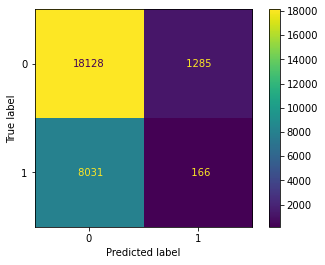

In [18]:
confusionmatrix = plot_confusion_matrix(SVM, X_test, y_test, values_format='5d')
print("SVM Model Accuracy: %f" % SVM.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Naive Bayes Model Accuracy: 0.703187


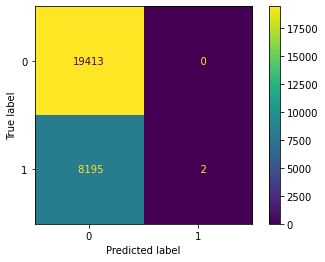

In [19]:
confusionmatrix = plot_confusion_matrix(gnb, X_test, y_test, values_format='5d')
print("Naive Bayes Model Accuracy: %f" % gnb.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


 Random Forest Model Accuracy: 0.992104


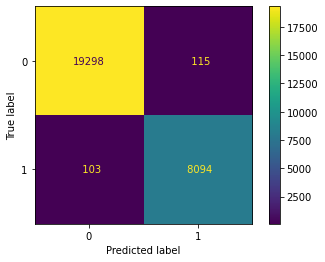

In [20]:
confusionmatrix = plot_confusion_matrix(RF, X_test, y_test, values_format='5d')
print(" Random Forest Model Accuracy: %f" % RF.score(X_test, y_test))  
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KKN Model Accuracy: 0.990293


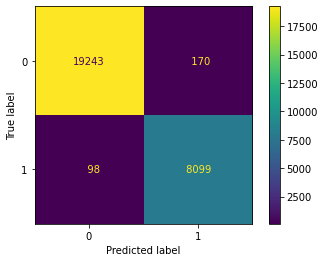

In [21]:
confusionmatrix = plot_confusion_matrix(KNN_model, X_test, y_test, values_format='5d')
print("KKN Model Accuracy: %f" % KNN_model.score(X_test, y_test))  
plt.show()

In [23]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


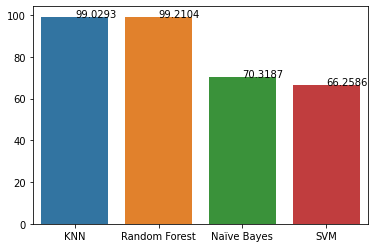

In [26]:
Myscore1 = {'KNN' : 99.0293,'Random Forest': 99.2104, 'Naïve Bayes': 70.3187, 'SVM' : 66.2586}
score1= list(Myscore1.values())
model = list(Myscore1.keys())
sns.barplot(model,score1) 
for index, value in enumerate(score1): 
    plt.text(index,value,str(value)) 
    
plt.show() 

In [24]:
from tabulate import tabulate
Myscore3 = [['KNN', KNN_model.score(X_test, y_test)*100],
            ['Random Forest', RF.score(X_test, y_test)*100], 
            ['Naïve Bayes', gnb.score(X_test, y_test)*100], 
            ['SVM' , SVM.score(X_test, y_test)*100]]

  
#define header names
col_names = ["Model", "Accuracy"]
  
#display table
print(tabulate(Myscore3, headers=col_names))

Model            Accuracy
-------------  ----------
KNN               99.0293
Random Forest     99.2104
Naïve Bayes       70.3187
SVM               66.2586


In [25]:
print('df_results: ', df_results)

df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accurary  Precision     Recall   F1-Score
2        KNN   99.029337  97.944129  98.804441  98.372404
3         RF   99.210431  98.599099  98.743443  98.671218
4         NB   70.318725      100.0   0.024399   0.048786
5        SVM   66.258602  11.440386   2.025131   3.441128


In [28]:
model = { 
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()   
}

Training each of the model with the X_train and testing with X_test.
The model with best accuracy will be ranked as winner

In [29]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

RandomForest : 0.9943860919956538 
Adaboost : 0.9867439333574791 
GradientBoosting : 0.9892068091271279 
GNB : 0.703187250996016 
LinearRegression : 0.5293309225004319 


Saving the model